<a href="https://colab.research.google.com/github/jyotirangu/DataScience/blob/main/12_Pandas/4_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

### `Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [2]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [3]:
# i. Create a DataFrame birds from the above dictionary data which has the index labels.

df1 = pd.DataFrame(data, index = labels)
df1

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [8]:
# ii. Display basic information about the dataFrame.
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 740.0+ bytes


,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [9]:
# iii. Show Alternate rows of the dataframe.
df1.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### `Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [11]:
# i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']
df1[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [12]:
# ii. Select rows where the number of visits is less than 4.
df1[df1['visits'] < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [14]:
# i. Select all rows with nan values in age and visits column.
df1[df1.age.isna() | df1.visits.isna()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [15]:
# ii. Fill nan with respective series mode value.
df1.age.fillna(df1.age.mode()[0], inplace=True)
df1.visits.fillna(df1.visits.mode()[0], inplace=True)

### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [16]:
# i. Find the total number of visits of the bird Cranes

df1[df1.birds == 'Cranes'].visits.sum()

np.int64(14)

In [19]:
# ii. Find the number of each type of birds in dataframe.
df1.birds.value_counts()

,count
birds,
Cranes,5
spoonbills,4
plovers,2


In [22]:
# iii. Print no of duplicate rows
df1[df1.duplicated()]

,birds,age,visits,priority
h,Cranes,3.5,2,yes
k,Cranes,3.5,2,yes


In [23]:
# iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

df1.drop_duplicates(inplace = True)


### `Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [30]:
data = pd.read_csv('IPL_Matches_2008_2022.csv')
changed_name = {'Delhi Daredevils':'Delhi Capitals',
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiants':'Rising Pune Supergiant'}

data.replace(changed_name.keys(), changed_name.values(),inplace=True)
data.head(4)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma


### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

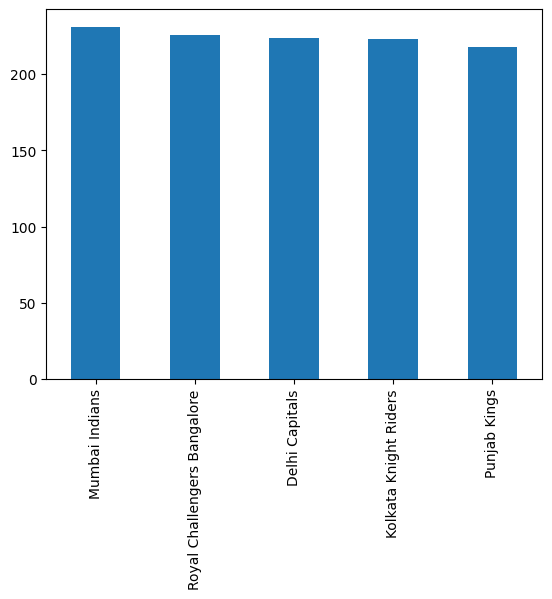

In [32]:
(data['Team1'].value_counts() + data['Team2'].value_counts()).sort_values(ascending=False).head().plot(kind='bar')

### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [37]:
m1 = (data.Team1 == 'Mumbai Indians') | (data.Team2 == 'Mumbai Indians')
m2 = (data.WinningTeam != 'Mumbai Indians')
data[m1 & m2].Player_of_Match.value_counts().head(1)

,count
Player_of_Match,
KL Rahul,4


### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [40]:
def team1_vs_team2(t1, t2):
  m1 = (data.Team1 == t1) | (data.Team2 == t2)
  m2 = (data.Team1 == t2) | (data.Team2 == t2)
  df1 = data[m1 & m2]
  print(df1.WinningTeam.value_counts())
  print(df1.Player_of_Match.value_counts().head(1))

team1_vs_team2('Kolkata Knight Riders', 'Chennai Super Kings')

WinningTeam
Chennai Super Kings            56
Royal Challengers Bangalore     8
Mumbai Indians                  8
Punjab Kings                    6
Kolkata Knight Riders           5
Rajasthan Royals                5
Delhi Capitals                  4
Sunrisers Hyderabad             2
Pune Warriors                   1
Kochi Tuskers Kerala            1
Deccan Chargers                 1
Name: count, dtype: int64
Player_of_Match
MS Dhoni    8
Name: count, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

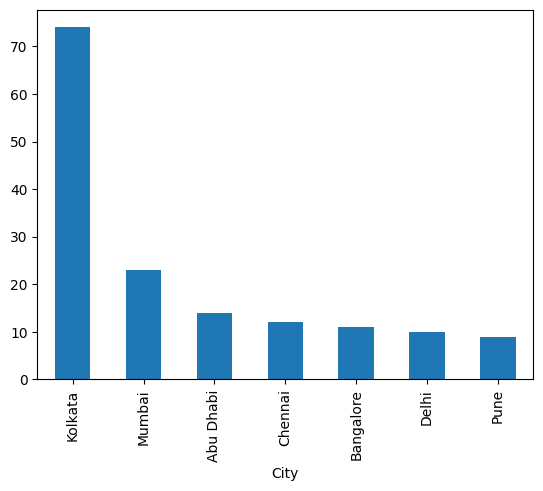

In [47]:
data[(data.Team1 == "Kolkata Knight Riders") | (data.Team2 == "Kolkata Knight Riders")].City.value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [48]:
data[((data.Team1 == "Mumbai Indians") | (data.Team2 == "Mumbai Indians")) & (data.Season == "2011")]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
703,501270,Chennai,2011-05-27,2011,Qualifier 2,Royal Challengers Bangalore,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,N,Royal Challengers Bangalore,Runs,43.0,NaN,CH Gayle,"['MA Agarwal', 'CH Gayle', 'V Kohli', 'AB de V...","['AC Blizzard', 'SR Tendulkar', 'Harbhajan Sin...",Asad Rauf,SJA Taufel
704,501269,Mumbai,2011-05-25,2011,Elimination Final,Mumbai Indians,Kolkata Knight Riders,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,4.0,NaN,MM Patel,"['AC Blizzard', 'SR Tendulkar', 'RG Sharma', '...","['G Gambhir', 'JH Kallis', 'SP Goswami', 'MK T...",Asad Rauf,SJA Taufel
706,501267,Kolkata,2011-05-22,2011,70,Kolkata Knight Riders,Mumbai Indians,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JEC Franklin,"['JH Kallis', 'SP Goswami', 'G Gambhir', 'MK T...","['TL Suman', 'SR Tendulkar', 'Harbhajan Singh'...",SK Tarapore,SJA Taufel
710,501263,Mumbai,2011-05-20,2011,66,Mumbai Indians,Rajasthan Royals,Wankhede Stadium,Mumbai Indians,bat,N,Rajasthan Royals,Wickets,10.0,NaN,SR Watson,"['TL Suman', 'SR Tendulkar', 'AT Rayudu', 'RG ...","['SR Watson', 'R Dravid', 'J Botha', 'AL Menar...",RE Koertzen,PR Reiffel
718,501256,Mumbai,2011-05-14,2011,59,Mumbai Indians,Deccan Chargers,Wankhede Stadium,Deccan Chargers,bat,N,Deccan Chargers,Runs,10.0,NaN,A Mishra,"['SR Tendulkar', 'AC Blizzard', 'AT Rayudu', '...","['MJ Lumb', 'S Sohal', 'KC Sangakkara', 'JP Du...",S Ravi,SK Tarapore
722,501251,Chandigarh,2011-05-10,2011,54,Punjab Kings,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,field,N,Punjab Kings,Runs,76.0,NaN,BA Bhatt,"['PC Valthaty', 'AC Gilchrist', 'SE Marsh', 'K...","['AC Blizzard', 'SR Tendulkar', 'RG Sharma', '...",SK Tarapore,RJ Tucker
727,501246,Mumbai,2011-05-07,2011,49,Mumbai Indians,Delhi Capitals,Wankhede Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,32.0,NaN,AT Rayudu,"['AC Blizzard', 'SR Tendulkar', 'AT Rayudu', '...","['V Sehwag', 'DA Warner', 'CA Ingram', 'NV Ojh...",K Hariharan,SJA Taufel
732,501241,Mumbai,2011-05-04,2011,44,Pune Warriors,Mumbai Indians,Dr DY Patil Sports Academy,Pune Warriors,field,N,Mumbai Indians,Runs,21.0,NaN,R Sharma,"['JD Ryder', 'MK Pandey', 'GC Smith', 'AA Jhun...","['AC Blizzard', 'SR Tendulkar', 'AT Rayudu', '...",HDPK Dharmasena,SJA Taufel
736,501237,Mumbai,2011-05-02,2011,40,Mumbai Indians,Punjab Kings,Wankhede Stadium,Punjab Kings,field,N,Mumbai Indians,Runs,23.0,NaN,KA Pollard,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'KA...","['PC Valthaty', 'AC Gilchrist', 'SE Marsh', 'D...",HDPK Dharmasena,PR Reiffel
742,501231,Jaipur,2011-04-29,2011,34,Rajasthan Royals,Mumbai Indians,Sawai Mansingh Stadium,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,J Botha,"['SR Watson', 'R Dravid', 'J Botha', 'LRPL Tay...","['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'RG...",Asad Rauf,SK Tarapore
